# NSIDC Iceflow example

This notebook shows an example of how to use the `nsidc-iceflow` Python library to do ITRF transformations with real data. We recommend starting with the [corrections.ipynb](https://github.com/nsidc/NSIDC-Data-Tutorials/blob/main/notebooks/iceflow/corrections.ipynb) notebook to learn more about ITRF transformations and why they matter. 

Lets assume we want to do an analysis using [IceBridge ATM L1B Qfit Elevation and Return Strength, Version 1 (ILATM1B)](https://nsidc.org/data/ilatm1b/versions/1) data near Pine Island Glacier in Antarctica.

Finding, downloading, and reading ILATM1B v1 data with `nsidc-iceflow` is straightforward. ILATM1B data can be very large, so for the purposes of this example we will focus on just a small area near Pine Island Glacier along with a short date range in order to fetch a manageable amount of data.

To learn about how to download and manage larger amounts of data across many datasets with `nsidc-iceflow`, see the [Using iceflow with icepyx to Generate an Elevation Timeseries](./iceflow-with-icepyx.ipynb) notebook.

## Import required packages

We will import several functions from the `nsidc-iceflow` library along with `pathlib` to specify a download path, `datetime` to define our date range, and `matplotlib` to plot our results.

In [1]:
from __future__ import annotations

import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt

from nsidc.iceflow import (
    BoundingBox,
    DatasetSearchParameters,
    ILATM1BDataset,
    download_iceflow_results,
    find_iceflow_data,
    read_iceflow_datafiles,
)

# note: use `inline` to save the resulting image as an embedded png (nice for sharing). \
# Use `widget` to obtain interactive controls to explore the data in depth!
%matplotlib inline
# %matplotlib widget

## Finding, downloading, and reading data

Next we define our download path, data set of interest, and filter parameters:

In [2]:
# Downloaded data will go here.
data_path = Path("./downloaded-data/")

# Define the dataset that we want to search for.
atm1b_v1_dataset = ILATM1BDataset(version="1")

# Define the dataset that we want to search for.
atm1b_v1_dataset = ILATM1BDataset(version="1")
# Define a bounding box for our area of interest.
BBOX = BoundingBox(
    lower_left_lon=-103.125559,
    lower_left_lat=-75.180563,
    upper_right_lon=-102.677327,
    upper_right_lat=-74.798063,
)

# We will define a short date range in 2009 to search for data.
date_range = (dt.date(2009, 11, 1), dt.date(2009, 12, 31))

Next, we use the `find_iceflow_data` function to search for data matching our search parameters. 

In [3]:
search_results = find_iceflow_data(
    dataset_search_params=DatasetSearchParameters(
        datasets=[atm1b_v1_dataset],
        bounding_box=BBOX,
        temporal=date_range,
    ),
)
len(search_results)

1

Once we have found data matching our area of interest, we can download the results with `download_iceflow_results`

In [4]:
downloaded_files = download_iceflow_results(search_results, output_dir=data_path)
print(downloaded_files)

2025-05-12 16:25:22.896 | INFO     | nsidc.iceflow.data.fetch:_download_iceflow_search_result:68 - Downloading 2 granules to downloaded-data/ILATM1B_1.


QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

[PosixPath('downloaded-data/ILATM1B_1/ILATM1B_20091109_203148.atm4cT3.qi')]


Finally, we can read the data we just downloaded with `read_iceflow_datafiles`. The output is a `pandas` DataFrame containing the matching data.

In [5]:
iceflow_df = read_iceflow_datafiles(downloaded_files)

iceflow_df.head()

,rel_time,latitude,longitude,elevation,xmt_sigstr,rcv_sigstr,azimuth,pitch,roll,gps_pdop,pulse_width,gps_time,passive_signal,passive_footprint_latitude,passive_footprint_longitude,passive_footprint_synthesized_elevation,ITRF
utc_datetime,,,,,,,,,,,,,,,,,
2009-11-09 20:31:49.000,0.0,-75.159033,-102.290217,136.427994,1406.0,1393.0,164903.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159036,-102.290130,136.436996,973.0,1064.0,166291.0,1547.0,1253.0,24.0,6.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159041,-102.290045,136.386002,1586.0,1546.0,167679.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.000,0.0,-75.159046,-102.289961,136.347000,1101.0,1192.0,169067.0,1547.0,1253.0,24.0,7.0,203204000.0,NaN,NaN,NaN,NaN,ITRF2005
2009-11-09 20:31:49.001,1.0,-75.159051,-102.289878,136.298996,1302.0,1296.0,170455.0,1547.0,1253.0,24.0,8.0,203204001.0,NaN,NaN,NaN,NaN,ITRF2005


For the purposes of the rest of this example, we will narrow our focus to just the latitude, longitude, elevation, and ITRF values.

In [6]:
iceflow_df = iceflow_df[["latitude", "longitude", "elevation", "ITRF"]]
iceflow_df.head()

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290217,136.427994,ITRF2005
2009-11-09 20:31:49.000,-75.159036,-102.290130,136.436996,ITRF2005
2009-11-09 20:31:49.000,-75.159041,-102.290045,136.386002,ITRF2005
2009-11-09 20:31:49.000,-75.159046,-102.289961,136.347000,ITRF2005
2009-11-09 20:31:49.001,-75.159051,-102.289878,136.298996,ITRF2005


## ITRF transformations

We can see that ILATM1B v1 uses ITRF2005. Lets say we have other data that are in ITRF2014, and we want to compare that to the ILATM1B v1 data we just fetched. `nsidc-iceflow` provides a `transform_itrf` function that allows the user to transform latitude, longitude, and elevation data from an `nsidc-iceflow` dataframe into a target ITRF.

In [7]:
from nsidc.iceflow import transform_itrf

itrf2014_df = transform_itrf(data=iceflow_df, target_itrf="ITRF2014")
itrf2014_df.head()

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290217,136.420352,ITRF2014
2009-11-09 20:31:49.000,-75.159036,-102.290130,136.429354,ITRF2014
2009-11-09 20:31:49.000,-75.159041,-102.290045,136.378359,ITRF2014
2009-11-09 20:31:49.000,-75.159046,-102.289961,136.339358,ITRF2014
2009-11-09 20:31:49.001,-75.159051,-102.289878,136.291354,ITRF2014


Let's take a look at the differences between the original data (ITRF2005) and the data that has been transformed to ITRF2014.

In [8]:
for variable in ["latitude", "longitude", "elevation"]:
    print(
        f"Max difference in {variable}: {abs(itrf2014_df[variable] - iceflow_df[variable]).max()}"
    )

Max difference in latitude: 1.8509084043216717e-08
Max difference in longitude: 7.992288431069028e-08
Max difference in elevation: 0.00764224398881197


We can see here that the differences are very small! The largest elevation difference is 0.007 - 7mm!

## Propagating data to a new epoch

Now lets assume we need to propagate the data to a target epoch of 2019.7, which corresponds to September 13, 2019. This accounts for continental plate motion.

The `transform_itrf` function optionally takes a `target_epoch` in order to do this transformation. We'll use the original data as input.

In [9]:
itrf2014_epoch_2019_7_df = transform_itrf(
    data=iceflow_df,
    target_itrf="ITRF2014",
    target_epoch="2019.7",
)

itrf2014_epoch_2019_7_df.head()

,latitude,longitude,elevation,ITRF
utc_datetime,,,,
2009-11-09 20:31:49.000,-75.159033,-102.290223,136.420439,ITRF2014
2009-11-09 20:31:49.000,-75.159036,-102.290136,136.429442,ITRF2014
2009-11-09 20:31:49.000,-75.159041,-102.290051,136.378447,ITRF2014
2009-11-09 20:31:49.000,-75.159046,-102.289967,136.339446,ITRF2014
2009-11-09 20:31:49.001,-75.159051,-102.289884,136.291442,ITRF2014


The maximum difference is still small:

In [10]:
for variable in ["latitude", "longitude", "elevation"]:
    print(
        f"Max difference in {variable}: {abs(itrf2014_epoch_2019_7_df[variable] - iceflow_df[variable]).max()}"
    )

Max difference in latitude: 4.5290964578725834e-07
Max difference in longitude: 5.71210246391729e-06
Max difference in elevation: 0.007554534822702408


## Visualizing the differences

To visualize the differences, which are very small, we need to zoom in on just a small subset of points. First we set a filter condition and apply it to each DataFrame.

In [11]:
filter_condition = (iceflow_df.reset_index().index > 50) & (
    iceflow_df.reset_index().index < 60
)
sampled_iceflow_df = iceflow_df[filter_condition]
sampled_itrf2014_df = itrf2014_df[filter_condition]
sampled_itrf2014_epoch_2019_7_df = itrf2014_epoch_2019_7_df[filter_condition]

Now we create a 3D plot using `matplotlib` to visualize the differences across latitude, longitude, and elevation. 

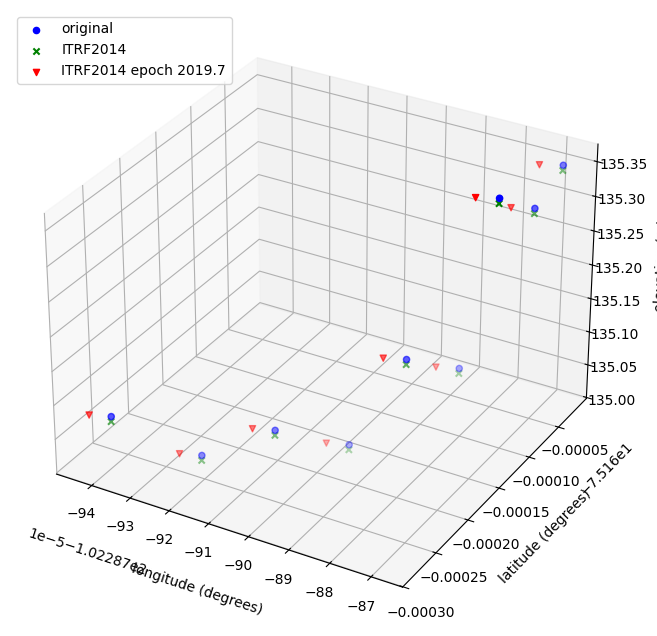

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    sampled_iceflow_df.longitude.values,
    sampled_iceflow_df.latitude.values,
    sampled_iceflow_df.elevation.values,
    color="blue",
    marker="o",
    label="original",
)

ax.scatter(
    sampled_itrf2014_df.longitude.values,
    sampled_itrf2014_df.latitude.values,
    sampled_itrf2014_df.elevation.values,
    color="green",
    marker="x",
    label="ITRF2014",
)

ax.scatter(
    sampled_itrf2014_epoch_2019_7_df.longitude.values,
    sampled_itrf2014_epoch_2019_7_df.latitude.values,
    sampled_itrf2014_epoch_2019_7_df.elevation.values,
    color="red",
    marker="v",
    label="ITRF2014 epoch 2019.7",
)

ax.set_xlabel("longitude (degrees)", labelpad=10)
ax.set_ylabel("latitude (degrees)", labelpad=10)
ax.set_zlabel("elevation (m)", labelpad=10)
plt.legend(loc="upper left")
plt.show()